<h1 align=center><font size = 5>Health Care Analysis</font></h1>

In [1]:
import numpy as np

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json 

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests # library to handle requests

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

from sklearn.preprocessing import StandardScaler
from pandas.io.json import json_normalize 
from sklearn.cluster import DBSCAN, KMeans


%matplotlib inline

## Project description

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Datasets</a>

2. <a href="#item2">Clean Data</a>

3. <a href="#item3">Explore Countries Selected</a>

4. <a href="#item4">Retrieving Foursquare Data</a> 
    
5. <a href="#item5">DSBC Clustering</a>    

6. <a href="#item6">K-Means Clustering</a>  

7. <a href="#item6">Results Visualization</a>   
</font>
</div>

## 1. Download and Explore Datasets

In [2]:
Data_health=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_total_health_expenditure_per_capita')[5]
Data_health.head(190)

,Countries,2000,2005,2010,2015
0,Afghanistan,:,24,46,60
1,Albania,76,166,204,266
2,Algeria,61,100,228,292
3,Andorra,2051,4037,4596,4316
4,Angola,14,57,97,109
5,Antigua and Barbuda,381,490,673,657
6,Argentina,418,327,699,998
7,Armenia,41,116,169,366
8,Australia,1632,3004,4953,4934
9,Austria,2263,3676,4725,4536


In [3]:
Data_health.shape

(189, 5)

In [4]:

Data_Cost_Life=pd.read_html('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp')[2]
Data_Cost_Life.head(140)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,NaN,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,NaN,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,NaN,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,NaN,Denmark,83.00,31.92,58.57,61.74,100.75,100.88
5,NaN,Bahamas,82.51,36.36,60.43,62.65,83.66,54.18
6,NaN,Luxembourg,81.89,54.92,68.99,69.10,89.85,103.92
7,NaN,Israel,81.15,31.33,57.32,66.31,88.65,78.09
8,NaN,Singapore,81.10,63.27,72.58,66.75,58.99,88.96
9,NaN,South Korea,78.18,22.86,51.72,91.31,44.87,85.21


In [5]:
Data_Cost_Life.shape

(132, 8)

In [6]:
Data_Life_Expentancy=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')[0]
Data_Life_Expentancy.head(196)

Rank                     Country/Region  \
    Rank                     Country/Region   
0      1                          Hong Kong   
1      2                              Japan   
2      3                        Switzerland   
3      4                          Singapore   
4      5                              Italy   
5      5                              Spain   
6      7                          Australia   
7      8                            Iceland   
8      9                             Israel   
9      9                        South Korea   
10    11                             Sweden   
11    12                             France   
12    13                              Malta   
13    14                             Canada   
14    14                             Norway   
15    15                         Luxembourg   
16    15                            Ireland   
17    15                        New Zealand   
18    15                        Netherlands   
19    15                             Greece   
20    20                           Portugal   
21    21                            Andorra   
22    22                            Finland   
23    23                            Belgium   
24    24                            Austria   
25    25                            Germany   
26    25                     United Kingdom   
27    25                           Slovenia   
28    28                             Cyprus   
29    28                            Denmark   
30    30                      Liechtenstein   
31    31                         Costa Rica   
32    32                              Chile   
33    33                     Czech Republic   
34    34                           Barbados   
35    35                            Lebanon   
36    35                      United States   
37    37                               Cuba   
38    38                             Poland   
39    39                             Panama   
40    39                            Croatia   
41    41               United Arab Emirates   
42    41                            Uruguay   
43    43                               Oman   
44    44                           Slovakia   
45    45                             Turkey   
46    46             Bosnia and Herzegovina   
47    47                            Bahrain   
48    48                           Colombia   
49    49                Antigua and Barbuda   
50    49                           Thailand   
51    51                            Ecuador   
52    51                         Montenegro   
53    51                          Sri Lanka   
54    54                            Algeria   
55    54         People's Republic of China   
56    54                            Hungary   
57    57                          Argentina   
58    57                               Iran   
59    57                            Morocco   
60    57                               Peru   
61    57                            Tunisia   
62    62                        Saint Lucia   
63    63                           Malaysia   
64    64                            Romania   
65    65                             Serbia   
66    66                             Brazil   
67    66                             Brunei   
68    66                          Lithuania   
69    66                    North Macedonia   
70    71                             Kuwait   
71     —    Latin America and the Caribbean   
72     —          East Asia and the Pacific   
73    72                            Vietnam   
74    73                             Latvia   
75    74                           Honduras   
76    75                             Mexico   
77    75                       Saudi Arabia   
78    77                            Armenia   
79    77                           Bulgaria   
80    77                          Mauritius   
81    80                            Belarus   
82    80              Saint Kitts and Nevis   
83    82 

In [7]:
Data_Life_Expentancy.shape

(191, 5)

In [8]:
Country_GeoData=pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')[0]
Country_GeoData.rename(columns={'name':'Country'}, inplace=True)
Country_GeoData.head(100)


,country,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


## 2. Clean data

In [9]:
Data_health.reset_index(inplace=True)
Data_health.drop(columns=['index'], inplace=True)
Data_health.rename(columns={'Countries':'Country'}, inplace=True)
Data_health.replace(':', 0, inplace=True)
Data_health.loc[180, 'Country']='United States'
Data_health.head(200)

,Country,2000,2005,2010,2015
0,Afghanistan,0,24,46,60
1,Albania,76,166,204,266
2,Algeria,61,100,228,292
3,Andorra,2051,4037,4596,4316
4,Angola,14,57,97,109
5,Antigua and Barbuda,381,490,673,657
6,Argentina,418,327,699,998
7,Armenia,41,116,169,366
8,Australia,1632,3004,4953,4934
9,Austria,2263,3676,4725,4536


In [10]:
#Data_Cost_Life.drop(columns=['Rank'], inplace=True)
Data_Cost_Life.rename(columns={'Countries':'Country'}, inplace=True)
Data_Cost_Life.replace(':', 0, inplace=True)
Data_Cost_Life.head(100)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,NaN,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,NaN,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,NaN,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,NaN,Denmark,83.00,31.92,58.57,61.74,100.75,100.88
5,NaN,Bahamas,82.51,36.36,60.43,62.65,83.66,54.18
6,NaN,Luxembourg,81.89,54.92,68.99,69.10,89.85,103.92
7,NaN,Israel,81.15,31.33,57.32,66.31,88.65,78.09
8,NaN,Singapore,81.10,63.27,72.58,66.75,58.99,88.96
9,NaN,South Korea,78.18,22.86,51.72,91.31,44.87,85.21


In [11]:
Data_Life_Expentancy.columns = Data_Life_Expentancy.columns.droplevel()
Data_Life_Expentancy.replace(':', 0, inplace=True)
Data_Life_Expentancy.reset_index(0).reset_index(drop=True)
Data_Life_Expentancy.rename(columns={'Country/Region':'Country'}, inplace=True)
Data_Life_Expentancy.head(200)

,Rank,Country,Overall,Female,Male
0,1,Hong Kong,84.7,87.6,81.8
1,2,Japan,84.5,87.5,81.3
2,3,Switzerland,83.6,85.5,81.7
3,4,Singapore,83.5,85.6,81.3
4,5,Italy,83.4,85.4,81.1
5,5,Spain,83.4,86.1,80.7
6,7,Australia,83.3,85.3,81.3
7,8,Iceland,82.9,84.4,81.3
8,9,Israel,82.8,84.4,81.1
9,9,South Korea,82.8,85.8,79.7


In [12]:

Data_health=Data_health.join(Data_Life_Expentancy.set_index('Country'), on='Country', how='left', lsuffix='_left', rsuffix='_right')
Data_health=Data_health.join(Data_Cost_Life.set_index('Country'), on='Country', how='left', lsuffix='_left', rsuffix='_right')
Data_health=Data_health.join(Country_GeoData.set_index('Country'), on='Country', how='left', lsuffix='_left', rsuffix='_right')


In [13]:
Data_health.drop(columns=['Rank_left','Female', 'Male','Rank_right', 'Rent Index','Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Restaurant Price Index', 'Local Purchasing Power Index','country','2000','2005','2010'], inplace=True)
Data_health.head(110)

,Country,2015,Overall,Cost of Living Index,latitude,longitude
0,Afghanistan,60,64.5,24.24,33.939110,67.709953
1,Albania,266,NaN,36.39,41.153332,20.168331
2,Algeria,292,76.7,30.10,28.033886,1.659626
3,Andorra,4316,81.8,NaN,42.546245,1.601554
4,Angola,109,60.8,NaN,-11.202692,17.873887
5,Antigua and Barbuda,657,76.9,NaN,17.060816,-61.796428
6,Argentina,998,76.5,32.95,-38.416097,-63.616672
7,Armenia,366,74.9,32.84,40.069099,45.038189
8,Australia,4934,83.3,73.54,-25.274398,133.775136
9,Austria,4536,81.4,70.38,47.516231,14.550072


In [14]:
Data_health.head()

,Country,2015,Overall,Cost of Living Index,latitude,longitude
0,Afghanistan,60,64.5,24.24,33.939110,67.709953
1,Albania,266,NaN,36.39,41.153332,20.168331
2,Algeria,292,76.7,30.10,28.033886,1.659626
3,Andorra,4316,81.8,NaN,42.546245,1.601554
4,Angola,109,60.8,NaN,-11.202692,17.873887


In [15]:
Data_health.dropna(inplace=True)
Data_health.rename(columns={'2015':'Health Care Expenses','latitude':'Latitude','longitude':'Longitude'}, inplace=True)
Data_health.reset_index(inplace=True,drop=True)
Data_health.head(200)

,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude
0,Afghanistan,60,64.5,24.24,33.939110,67.709953
1,Algeria,292,76.7,30.10,28.033886,1.659626
2,Argentina,998,76.5,32.95,-38.416097,-63.616672
3,Armenia,366,74.9,32.84,40.069099,45.038189
4,Australia,4934,83.3,73.54,-25.274398,133.775136
5,Austria,4536,81.4,70.38,47.516231,14.550072
6,Azerbaijan,368,72.9,29.92,40.143105,47.576927
7,Bahamas,1685,73.8,82.51,25.034280,-77.396280
8,Bahrain,1190,77.2,58.94,25.930414,50.637772
9,Bangladesh,32,72.3,32.25,23.684994,90.356331


In [16]:
Data_health.shape

(107, 6)

## 3. Explore Countries Selected

In [17]:
World_map = folium.Map(location=[0, 0], zoom_start=2)
color='blue'

# add markers to map
for lat, lng, country in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country']):
    label = '{}'.format(country)
    label = folium.Popup(label, parse_html=True) 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

## 4. Retrieving Foursquare Data

In [18]:
CLIENT_ID = 'JMVF4CRSAGPKHIZBTLP1JASTXCWG2TXX2V54BMJ24X13HJZH'
CLIENT_SECRET = '3S4JISGI0RES14MOR25VSBKTP22E3U4BGVJXLY4DCCP25ZOY'
VERSION = '20180604'
capital_latitude = Data_health['Latitude'] 
capital_longitude = Data_health['Longitude'] 

country_name = Data_health['Country'] 


    
    

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
  

In [20]:

column_names = ["name", "categories", "Country"]
Foursquare_data = pd.DataFrame(columns = column_names)



for lat, lng, country in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country']):        
    
    LIMIT = 100 
    radius = 50000
    capital_latitude=lat
    capital_longitude=lng

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        capital_latitude, 
        capital_longitude, 
        radius, 
        LIMIT)
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    nearby_venues['Country'] = country

    Foursquare_data=Foursquare_data[["name", "categories", "Country"]].append(nearby_venues[["name", "categories", "Country"]])



In [21]:
Foursquare_data.shape

(5722, 3)

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Zimbabwe Kalkindirma Ve Guzellestirme Dernegi,Outdoors & Recreation,-19.015436,29.154859


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


In [24]:
Countries_data = Foursquare_data
Countries_data.head(20)
venues=Countries_data['categories'].loc[Countries_data['Country'] == 'Afghanistan']
s=venues.value_counts()
s.index[0]

'Cafeteria'

In [25]:
Data_health["1st_common"] = np.nan
Data_health["2nd_common"] = np.nan
Data_health["3rd_common"] = np.nan
Data_health["4th_common"] = np.nan
Data_health["5th_common"] = np.nan

for Country in Data_health['Country']: 

    venues=Countries_data['categories'].loc[Countries_data['Country'] == Country]
    s=venues.value_counts()
    
    try:
        Data_health['1st_common'].loc[Data_health['Country']==Country]=s.index[0]
    except IndexError:
        pass    
    
    try:
        Data_health['2nd_common'].loc[Data_health['Country']==Country]=s.index[1]
    except IndexError:
        pass
    
    try:
        Data_health['3rd_common'].loc[Data_health['Country']==Country]=s.index[2] 
    except IndexError:
        pass    
    
    try:
        Data_health['4th_common'].loc[Data_health['Country']==Country]=s.index[3] 
    except IndexError:
        pass
   
    try:
        Data_health['5th_common'].loc[Data_health['Country']==Country]=s.index[4]
    except IndexError:
        pass

/Users/marcosnegresaura/opt/anaconda3/envs/Takeiteasy/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
Data_health.head(10)

,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude,1st_common,2nd_common,3rd_common,4th_common,5th_common
0,Afghanistan,60,64.5,24.24,33.939110,67.709953,Cafeteria,NaN,NaN,NaN,NaN
1,Algeria,292,76.7,30.10,28.033886,1.659626,Café,Scenic Lookout,Amphitheater,African Restaurant,NaN
2,Argentina,998,76.5,32.95,-38.416097,-63.616672,Hotel,Chocolate Shop,Asian Restaurant,Gift Shop,Brewery
3,Armenia,366,74.9,32.84,40.069099,45.038189,Restaurant,Hotel,Café,Park,Coffee Shop
4,Australia,4934,83.3,73.54,-25.274398,133.775136,Gym,Harbor / Marina,Airport,Electronics Store,American Restaurant
5,Austria,4536,81.4,70.38,47.516231,14.550072,Hotel,Restaurant,Ski Area,Austrian Restaurant,Supermarket
6,Azerbaijan,368,72.9,29.92,40.143105,47.576927,Restaurant,Park,Steakhouse,NaN,NaN
7,Bahamas,1685,73.8,82.51,25.034280,-77.396280,Resort,Beach,Caribbean Restaurant,Restaurant,Seafood Restaurant
8,Bahrain,1190,77.2,58.94,25.930414,50.637772,Coffee Shop,Café,Restaurant,Middle Eastern Restaurant,Hotel
9,Bangladesh,32,72.3,32.25,23.684994,90.356331,Café,Coffee Shop,Nightclub,Asian Restaurant,Indian Restaurant


In [27]:
Data_health.head(100)
Data_health_back=Data_health[['Health Care Expenses','Overall', 'Cost of Living Index','Country']]

In [28]:
Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']] = StandardScaler().fit_transform(Data_health[['Health Care Expenses','Overall','Cost of Living Index']])
Data_health.head(100)

,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude,1st_common,2nd_common,3rd_common,4th_common,5th_common
0,Afghanistan,-0.693811,-1.877854,-1.355355,33.939110,67.709953,Cafeteria,NaN,NaN,NaN,NaN
1,Algeria,-0.578562,0.202736,-1.046424,28.033886,1.659626,Café,Scenic Lookout,Amphitheater,African Restaurant,NaN
2,Argentina,-0.227850,0.168628,-0.896176,-38.416097,-63.616672,Hotel,Chocolate Shop,Asian Restaurant,Gift Shop,Brewery
3,Armenia,-0.541802,-0.104237,-0.901975,40.069099,45.038189,Restaurant,Hotel,Café,Park,Coffee Shop
4,Australia,1.727396,1.328300,1.243670,-25.274398,133.775136,Gym,Harbor / Marina,Airport,Electronics Store,American Restaurant
5,Austria,1.529685,1.004274,1.077080,47.516231,14.550072,Hotel,Restaurant,Ski Area,Austrian Restaurant,Supermarket
6,Azerbaijan,-0.540809,-0.445317,-1.055914,40.143105,47.576927,Restaurant,Park,Steakhouse,NaN,NaN
7,Bahamas,0.113424,-0.291831,1.716556,25.034280,-77.396280,Resort,Beach,Caribbean Restaurant,Restaurant,Seafood Restaurant
8,Bahrain,-0.132472,0.288006,0.473979,25.930414,50.637772,Coffee Shop,Café,Restaurant,Middle Eastern Restaurant,Hotel
9,Bangladesh,-0.707720,-0.547641,-0.933079,23.684994,90.356331,Café,Coffee Shop,Nightclub,Asian Restaurant,Indian Restaurant


## 5. DSBC Clustering

In [29]:
# Compute DBSCAN
db = DBSCAN(eps=0.45).fit(Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
Data_health["Clus_Db"]=labels
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
Data_health[['Country','Health Care Expenses','Overall', 'Cost of Living Index','Clus_Db']].head(10)

,Country,Health Care Expenses,Overall,Cost of Living Index,Clus_Db
0,Afghanistan,-0.693811,-1.877854,-1.355355,2
1,Algeria,-0.578562,0.202736,-1.046424,0
2,Argentina,-0.227850,0.168628,-0.896176,0
3,Armenia,-0.541802,-0.104237,-0.901975,0
4,Australia,1.727396,1.328300,1.243670,1
5,Austria,1.529685,1.004274,1.077080,1
6,Azerbaijan,-0.540809,-0.445317,-1.055914,0
7,Bahamas,0.113424,-0.291831,1.716556,-1
8,Bahrain,-0.132472,0.288006,0.473979,0
9,Bangladesh,-0.707720,-0.547641,-0.933079,0


In [30]:
World_map = folium.Map(location=[0, 0], zoom_start=2)
# add markers to map
for lat, lng, country, Clus_Db,first,sec,third,fourth,fifth in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['Clus_Db'],Data_health['1st_common'],Data_health['2nd_common'],Data_health['3rd_common'],Data_health['4th_common'],Data_health['5th_common']):
    label = '{}. Most common venues: {},{},{},{},{}.'.format(country,first,sec,third,fourth,fifth)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == -2: color='grey' 
    if Clus_Db == -1: color='purple'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    


In [31]:
World_map

## 6. K-Means Clustering

In [32]:
kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)

In [33]:
Data_health.head(100)


,Country,Health Care Expenses,Overall,Cost of Living Index,Latitude,Longitude,1st_common,2nd_common,3rd_common,4th_common,5th_common,Clus_Db,K-Means Labels
0,Afghanistan,-0.693811,-1.877854,-1.355355,33.939110,67.709953,Cafeteria,NaN,NaN,NaN,NaN,2,2
1,Algeria,-0.578562,0.202736,-1.046424,28.033886,1.659626,Café,Scenic Lookout,Amphitheater,African Restaurant,NaN,0,0
2,Argentina,-0.227850,0.168628,-0.896176,-38.416097,-63.616672,Hotel,Chocolate Shop,Asian Restaurant,Gift Shop,Brewery,0,0
3,Armenia,-0.541802,-0.104237,-0.901975,40.069099,45.038189,Restaurant,Hotel,Café,Park,Coffee Shop,0,0
4,Australia,1.727396,1.328300,1.243670,-25.274398,133.775136,Gym,Harbor / Marina,Airport,Electronics Store,American Restaurant,1,6
5,Austria,1.529685,1.004274,1.077080,47.516231,14.550072,Hotel,Restaurant,Ski Area,Austrian Restaurant,Supermarket,1,6
6,Azerbaijan,-0.540809,-0.445317,-1.055914,40.143105,47.576927,Restaurant,Park,Steakhouse,NaN,NaN,0,0
7,Bahamas,0.113424,-0.291831,1.716556,25.034280,-77.396280,Resort,Beach,Caribbean Restaurant,Restaurant,Seafood Restaurant,-1,3
8,Bahrain,-0.132472,0.288006,0.473979,25.930414,50.637772,Coffee Shop,Café,Restaurant,Middle Eastern Restaurant,Hotel,0,3
9,Bangladesh,-0.707720,-0.547641,-0.933079,23.684994,90.356331,Café,Coffee Shop,Nightclub,Asian Restaurant,Indian Restaurant,0,7


### Clustering for Health Care Expenses, Life expectancy and Cost of Life

In [34]:
World_map = folium.Map(location=[0, 0], zoom_start=2)
Data_health[['Health Care Expenses','Overall', 'Cost of Living Index']]
# add markers to map
for lat, lng, country, Clus_Db,first,sec,third,fourth,fifth in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'],Data_health['1st_common'],Data_health['2nd_common'],Data_health['3rd_common'],Data_health['4th_common'],Data_health['5th_common']):
    label = '{}. Most common venues: {},{},{},{},{}.'.format(country,first,sec,third,fourth,fifth)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple'     
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

### Clustering for Health Care Expenses

In [35]:
Data_health.drop(['K-Means Labels'],inplace = True,axis = 1)

kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Health Care Expenses']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)
World_map = folium.Map(location=[0, 0], zoom_start=2)
# add markers to map
for lat, lng, country, Clus_Db, expenses,first,sec,third,fourth,fifth in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'], Data_health_back['Health Care Expenses'],Data_health['1st_common'],Data_health['2nd_common'],Data_health['3rd_common'],Data_health['4th_common'],Data_health['5th_common']):
    label = '{}, health car expenses per person: {}. Most common venues: {},{},{},{},{}.'.format(country,expenses,first,sec,third,fourth,fifth)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple'    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)


In [36]:
World_map

### Clustering for Life expectancy

In [37]:
Data_health.drop(['K-Means Labels'],inplace = True,axis = 1)

kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Overall']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)
World_map = folium.Map(location=[0, 0], zoom_start=2)

# add markers to map
for lat, lng, country, Clus_Db, life_expect,first,sec,third,fourth,fifth in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'],Data_health_back['Overall'],Data_health['1st_common'],Data_health['2nd_common'],Data_health['3rd_common'],Data_health['4th_common'],Data_health['5th_common']):
    label = '{}, life expentancy: {} years.  Most common venues: {},{},{},{},{}.'.format(country,life_expect,first,sec,third,fourth,fifth)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple' 
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

### Clustering for Cost of Life

In [38]:
Data_health.drop(['K-Means Labels'],inplace = True,axis = 1)

kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Data_health[['Cost of Living Index']])
kmeans.labels_[0:100]
Data_health.insert(len(Data_health.columns), 'K-Means Labels', kmeans.labels_)
World_map = folium.Map(location=[0, 0], zoom_start=2)

# add markers to map
for lat, lng, country, Clus_Db, cost_of_life,first,sec,third,fourth,fifth in zip(Data_health['Latitude'], Data_health['Longitude'] , Data_health['Country'], Data_health['K-Means Labels'],Data_health_back['Cost of Living Index'],Data_health['1st_common'],Data_health['2nd_common'],Data_health['3rd_common'],Data_health['4th_common'],Data_health['5th_common']):
    label = '{}, cost of life ratio: {}. Most common venues: {},{},{},{},{}.'.format(country,cost_of_life,first,sec,third,fourth,fifth)
    label = folium.Popup(label, parse_html=True) 
    if Clus_Db == 0: color='blue'
    if Clus_Db == 1: color='green'
    if Clus_Db == 2: color='red'
    if Clus_Db == 3: color='brown'
    if Clus_Db == 4: color='white'
    if Clus_Db == 5: color='black'  
    if Clus_Db == 6: color='yellow'   
    if Clus_Db == 7: color='pink' 
    if Clus_Db == 8: color='grey' 
    if Clus_Db == 9: color='purple'  
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(World_map)
    
World_map

## 7. Results Visualization

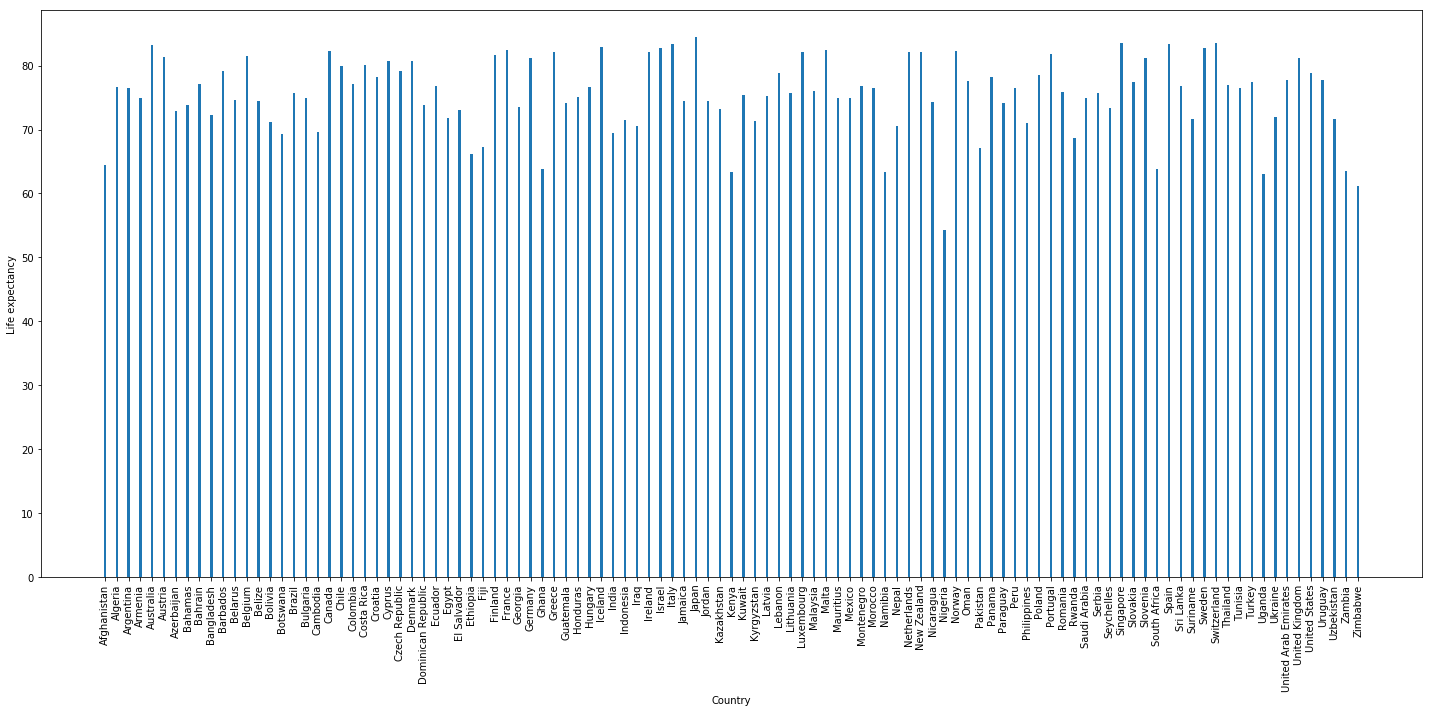

In [39]:

fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health_back['Overall'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Life expectancy')
fig.tight_layout()

plt.show()

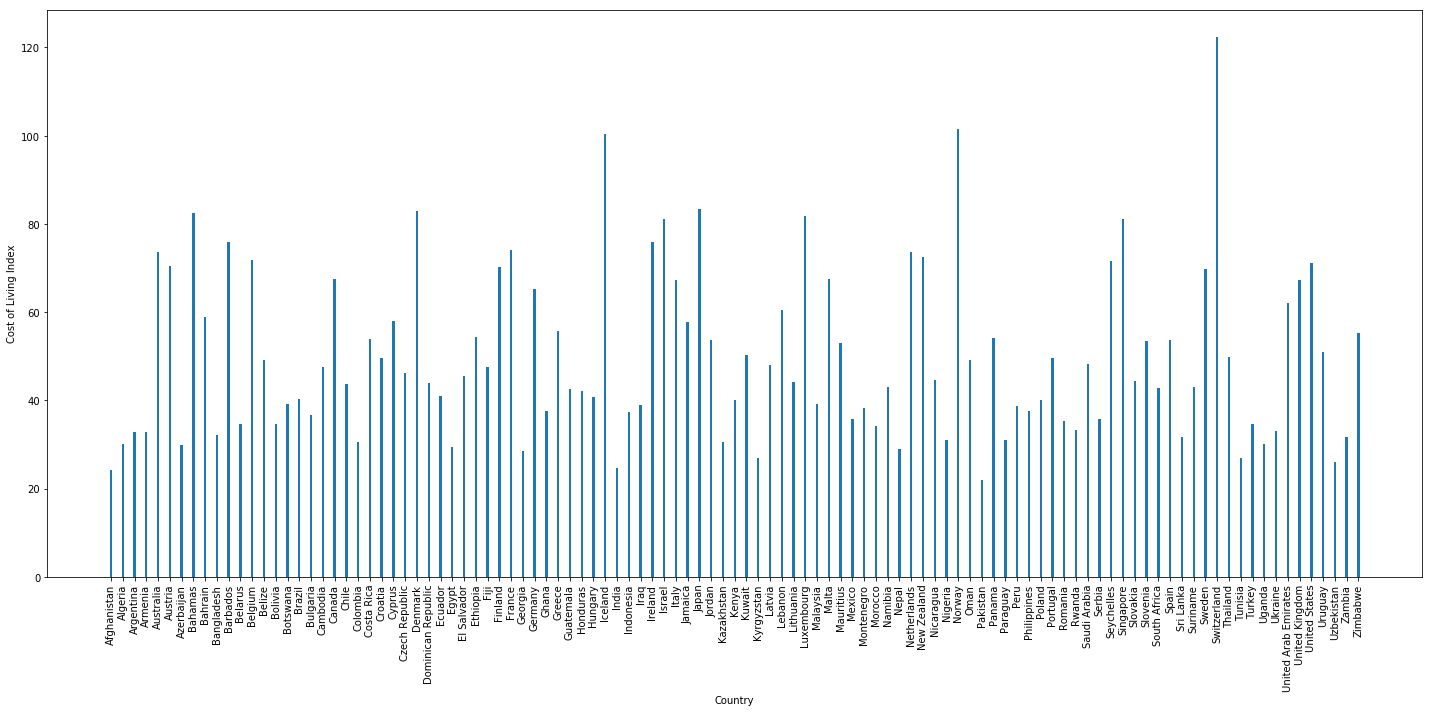

In [40]:
fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health_back['Cost of Living Index'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Cost of Living Index')
fig.tight_layout()

plt.show()

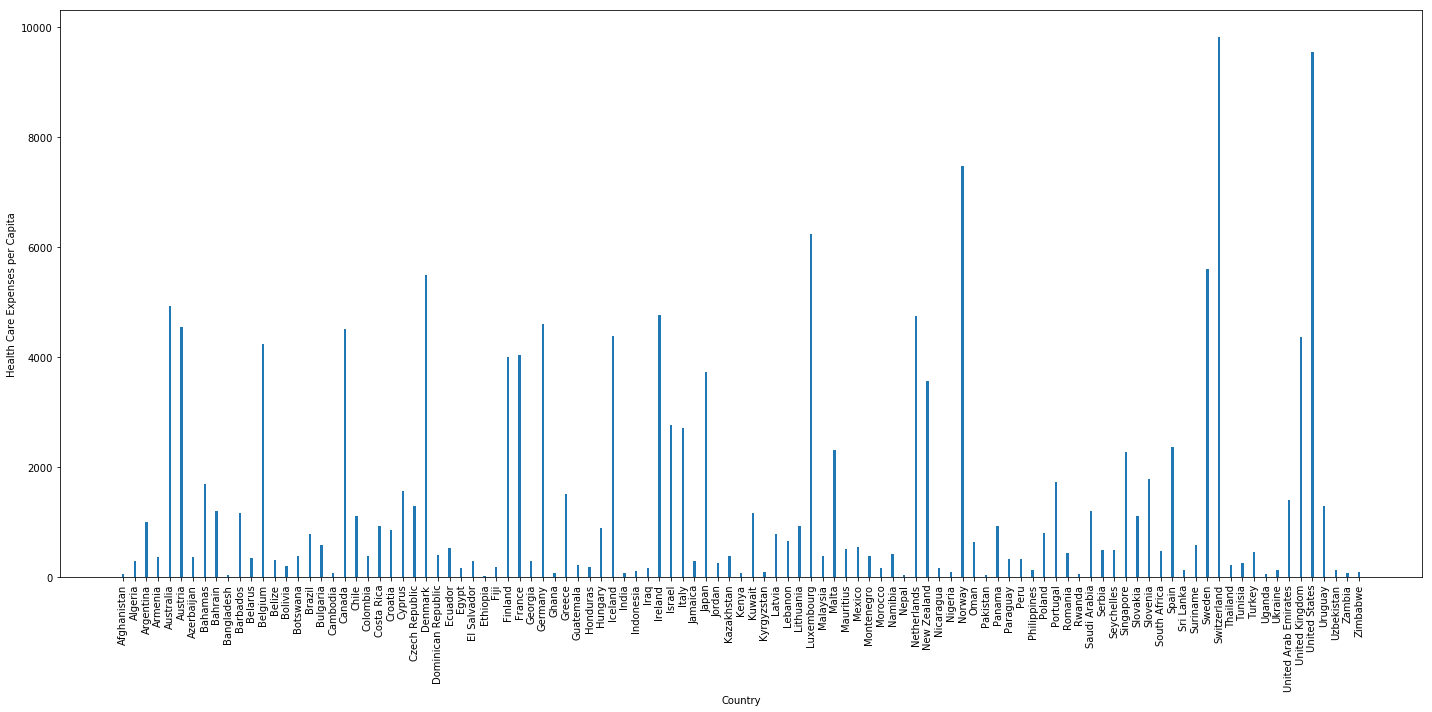

In [41]:
fig, ax = plt.subplots(figsize = (20,10))

idx = np.asarray(Data_health['Country'])

width = 0.2

ax.bar(idx, Data_health_back['Health Care Expenses'], width=width)

ax.set_xticks(idx)
ax.set_xticklabels(idx, rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Health Care Expenses per Capita')
fig.tight_layout()

plt.show()